# Pygor Tutorial

Welcome to the pygor3 Tutorial.

Pygor3 is an open source project and Python package that allows to analyze infer, evaluate and generate V(D)J sequences, by using IGoR's.

Pygor3 could help you to get simple calculations and visualizations of the statistics in VDJ recombination

We can use a default model in IGoR using as follows

# IgorModel

In [1]:
import pygor3 as p3
mdl_hb = p3.get_default_IgorModel("human", "tcr_beta")
mdl_ha = p3.get_default_IgorModel("human", "tcr_alpha")

Parms filename:  /home/olivares/.local/share/igor/models/human/tcr_beta/models/model_parms.txt
Marginals filename:  /home/olivares/.local/share/igor/models/human/tcr_beta/models/model_marginals.txt
Parms filename:  /home/olivares/.local/share/igor/models/human/tcr_alpha/models/model_parms.txt
Marginals filename:  /home/olivares/.local/share/igor/models/human/tcr_alpha/models/model_marginals.txt


In [2]:
print(mdl_hb)

.xdata['j_choice', 'v_3_del', 'd_gene', 'vd_ins', 'vd_dinucl', 'j_5_del', 'd_3_del', 'v_choice', 'd_5_del', 'dj_ins', 'dj_dinucl']


The mdl_hb object encapsulates the information about IGoR's model, like the Bayes network and the corresponding conditional probabilities for each event.

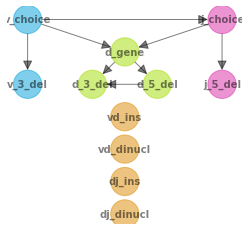

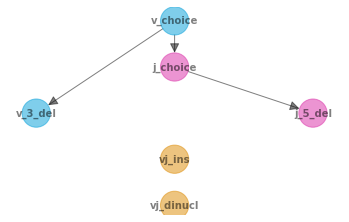

In [3]:
ax = mdl_hb.plot_Bayes_network()
ax = mdl_ha.plot_Bayes_network()

## Conditional probabilities

To get the conditional probabilities associated with this model we can the DataArray as

IgorModel['event_nickname']

For instance from this Bayesian network, we can see that for this model the choice of V ('v_choice') or the number of insertions between the V and D segments are independent of the rest of events. Hence, 

$P(\text{v_choice})$ = mdl_hb['v_choice']

However, for events like 'd_gene' or 'j_5_del' there are some conditional dependencies, therefore the notation in pygor 

$P(\text{d_gene}| \text{v_choice}, \text{j_choice})$ = mdl_hb['d_gene']

The get the dependencies information there is variable parents as attribute

In [4]:
mdl_hb['v_choice']

<xarray.DataArray (v_choice: 89)>
array([4.88741e-03, 9.32369e-03, 9.32259e-03, 1.30320e-02, 3.43430e-04,
       8.50694e-03, 7.71250e-03, 6.12276e-04, 5.06104e-03, 4.59289e-05,
       4.48245e-03, 8.16181e-03, 7.00053e-04, 7.77164e-03, 1.16174e-02,
       1.16158e-02, 1.13872e-02, 1.06555e-02, 2.36870e-03, 2.28368e-02,
       1.56715e-04, 4.58447e-03, 0.00000e+00, 4.88782e-05, 0.00000e+00,
       1.54500e-02, 2.74050e-02, 5.18979e-03, 4.80289e-03, 1.62765e-01,
       6.61229e-02, 2.07174e-02, 7.36226e-04, 2.47846e-37, 1.07472e-02,
       2.03820e-02, 9.53245e-03, 9.53006e-03, 2.35607e-03, 2.39208e-03,
       2.39208e-03, 2.45219e-03, 1.66904e-02, 2.98807e-03, 2.98804e-03,
       1.59156e-02, 1.25468e-02, 9.06711e-03, 9.06936e-03, 9.76534e-02,
       9.57746e-03, 9.17011e-03, 1.14472e-02, 1.14458e-02, 9.77554e-03,
       1.89924e-02, 3.97949e-04, 1.70242e-03, 8.91336e-03, 6.73926e-03,
       6.69167e-03, 2.94257e-02, 1.38534e-02, 4.19227e-03, 4.19275e-03,
       2.48630e-03, 4.83399e-04, 1.29795e-07, 6.49975e-05, 1.94736e-02,
       1.94728e-02, 0.00000e+00, 3.91595e-03, 3.96230e-02, 0.00000e+00,
       0.00000e+00, 6.73805e-05, 2.90073e-02, 9.28490e-03, 5.32118e-03,
       8.18432e-03, 1.07035e-03, 3.64764e-04, 3.26790e-03, 3.26801e-03,
       3.26801e-03, 3.26809e-03, 8.23600e-04, 1.56399e-02])
Coordinates:
  * v_choice       (v_choice) int64 0 1 2 3 4 5 6 7 ... 81 82 83 84 85 86 87 88
    lbl__v_choice  (v_choice) object 'U66059|TRBV1*01|Homo sapiens|P|V-REGION...
    seq__v_choice  (v_choice) object 'GATACTGGAATTACCCAGACACCAAAATACCTGGTCACA...
Attributes:
    nickname:    v_choice
    event_type:  GeneChoice
    seq_type:    V_gene
    seq_side:    Undefined_side
    priority:    7
    parents:     []
    childs:      ['v_3_del', 'd_gene', 'j_choice']

(<Figure size 1296x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'$P($v_choice$)$'}>)

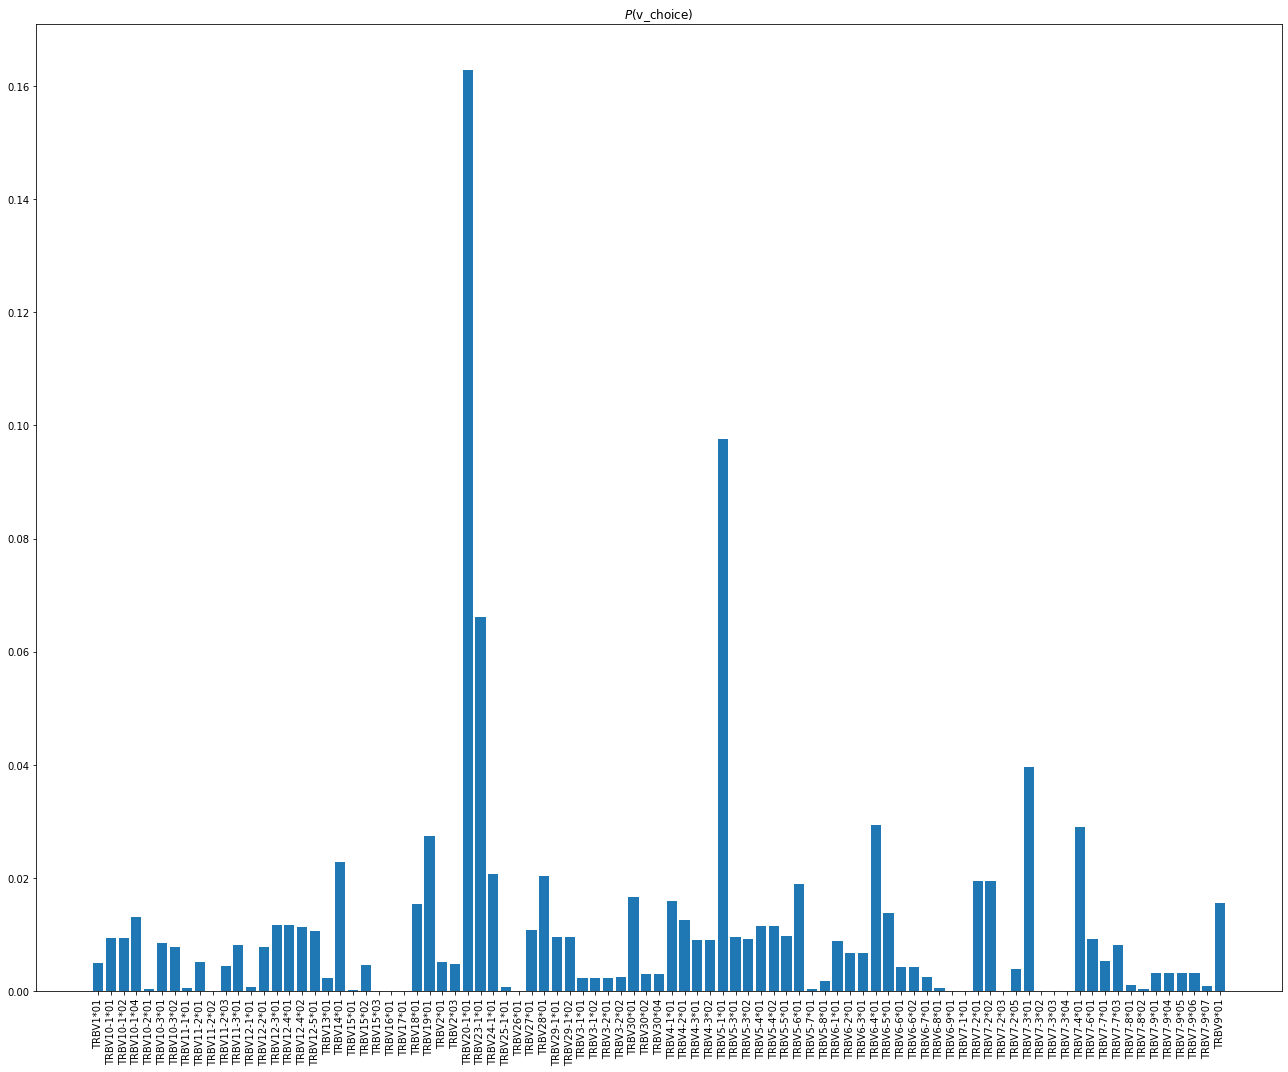

In [5]:
mdl_hb.plot_Event('v_choice')

(<Figure size 720x1440 with 6 Axes>,
 array([<AxesSubplot:title={'center':'$P($d_gene$ = $  TRBD1*01 $|$v_choice,j_choice$)$'}, xlabel='j_choice', ylabel='v_choice'>,
        <AxesSubplot:title={'center':'$P($d_gene$ = $  TRBD2*01 $|$v_choice,j_choice$)$'}, xlabel='j_choice', ylabel='v_choice'>,
        <AxesSubplot:title={'center':'$P($d_gene$ = $  TRBD2*02 $|$v_choice,j_choice$)$'}, xlabel='j_choice', ylabel='v_choice'>],
       dtype=object))

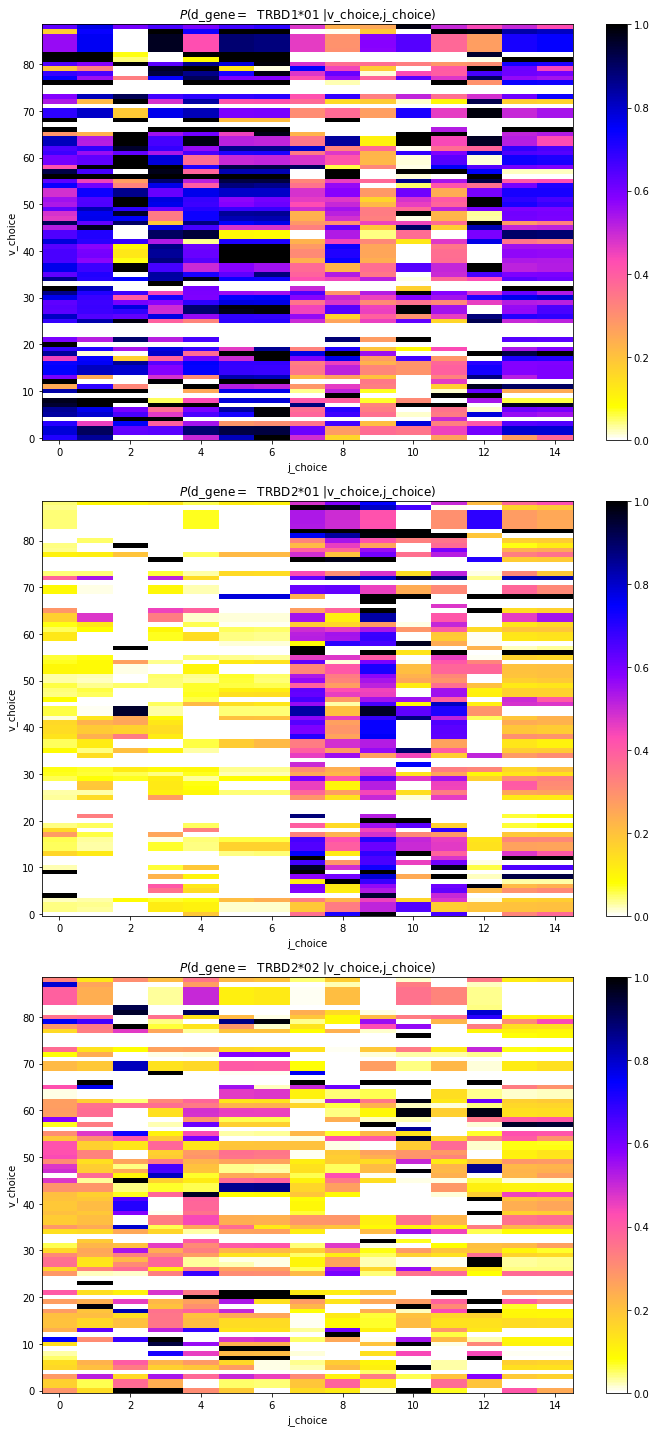

In [6]:
mdl_hb.plot_Event('d_gene')

## Marginal Probabilities

With IGoR provide us the conditional probabilities* of the events defined in the Bayesian network. 
So we can calculate marginal probabilities, i.e.

$P(\text{j_choice}) = \sum_{\text{v_choice}}P(\text{j_choice}, \text{v_choice})$

and using the Bayes theorem

$ P(\text{j_choice}, \text{v_choice}) = P(\text{j_choice} | \text{v_choice}) \times P(\text{v_choice})$

we get,

$P(\text{j_choice}) = \sum_{\text{v_choice}} P(\text{j_choice} | \text{v_choice}) \times P(\text{v_choice})$

(<xarray.DataArray (j_choice: 15)>
 array([0.11962186, 0.10538077, 0.02016188, 0.05684014, 0.09945672,
        0.03726745, 0.0322361 , 0.12542452, 0.05034454, 0.09853381,
        0.01948227, 0.07500318, 0.0190534 , 0.0709002 , 0.07029376])
 Coordinates:
   * j_choice       (j_choice) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
     lbl__j_choice  (j_choice) object 'K02545|TRBJ1-1*01|Homo sapiens|F|J-REGI...
     seq__j_choice  (j_choice) object 'TGAACACTGAAGCTTTCTTTGGACAAGGCACCAGACTCA...,
 [<matplotlib.lines.Line2D at 0x7f2a87a7bbd0>])

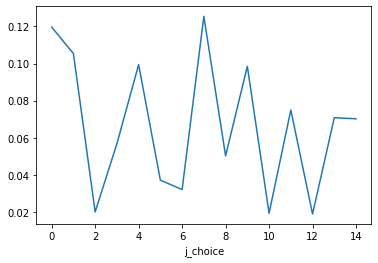

In [7]:
import xarray as xr
P_marginal_j_choice = xr.dot(mdl_hb['j_choice'], mdl_hb['v_choice'])
P_marginal_j_choice, P_marginal_j_choice.plot()

But when a model is loaded with pygor3 the marginals are calculated automatically using a variable elimination process
and are store in the Pmarginal variable

IgorModel.Pmarginal['event_nickname']

For this case

$ P(\text{'j_choice'}) = $ mdl_hb.Pmarginal['j_choice']

<xarray.DataArray (d_gene: 3)>
array([0.56140871, 0.2361217 , 0.20247255])
Coordinates:
  * d_gene       (d_gene) int64 0 1 2
    lbl__d_gene  (d_gene) object ' TRBD1*01' ' TRBD2*01' ' TRBD2*02'
    seq__d_gene  (d_gene) object 'GGGACAGGGGGC' ... 'GGGACTAGCGGGAGGG'

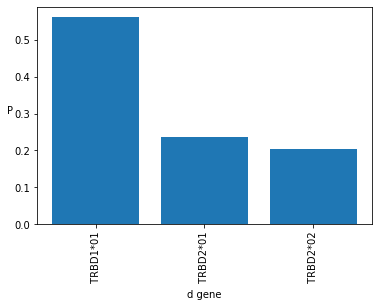

In [8]:
mdl_hb.plot_Event_Marginal('d_gene')
mdl_hb.Pmarginal['d_gene']

<AxesSubplot:xlabel='d 3 del', ylabel='P'>

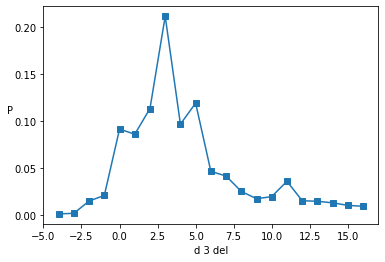

In [9]:
mdl_hb.plot_Event_Marginal('d_3_del')

## Joint Probabilities
Pygor3 also have a method to calculate the joint probabilities of events

IgorModel.get_P_joint(['event_nickname_1', 'event_nickname_2', ...])

> :WARNING: **Be carefull with this function a the computer memory consumption could increase if more than 2 events are requested**.

$P(\text{'v_choice'}, \text{'j_choice'}) = $mdl_hb.get_P_joint(['v_choice', 'j_choice'])

In [10]:
P_V_J = mdl_hb.get_P_joint(['v_choice', 'j_choice'])
P_V_J

<xarray.DataArray (v_choice: 89, j_choice: 15)>
array([[6.28453463e-04, 5.08306114e-04, 2.00831906e-04, ...,
        0.00000000e+00, 2.62143710e-04, 1.82391677e-04],
       [1.54890932e-03, 7.36213918e-04, 1.06011576e-04, ...,
        2.29432410e-04, 6.05154843e-04, 6.95679479e-04],
       [1.54900602e-03, 7.36581450e-04, 1.06039046e-04, ...,
        2.28733827e-04, 6.05348578e-04, 6.95983268e-04],
       ...,
       [4.05407259e-04, 1.55690174e-04, 0.00000000e+00, ...,
        1.15101267e-04, 1.80155267e-04, 1.96566942e-04],
       [3.00565952e-09, 1.68608515e-12, 0.00000000e+00, ...,
        2.81447867e-04, 5.64048061e-05, 6.77364474e-05],
       [1.65903669e-03, 1.77940202e-03, 6.30491475e-04, ...,
        3.45140763e-04, 1.12130116e-03, 9.08844648e-04]])
Coordinates:
  * v_choice       (v_choice) int64 0 1 2 3 4 5 6 7 ... 81 82 83 84 85 86 87 88
    seq__v_choice  (v_choice) object 'GATACTGGAATTACCCAGACACCAAAATACCTGGTCACA...
  * j_choice       (j_choice) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
    seq__j_choice  (j_choice) object 'TGAACACTGAAGCTTTCTTTGGACAAGGCACCAGACTCA...

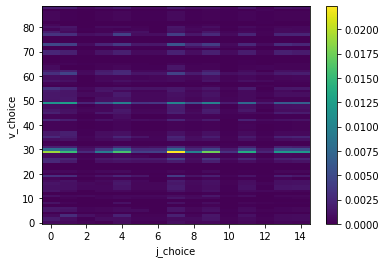

In [11]:
P_V_J.plot()

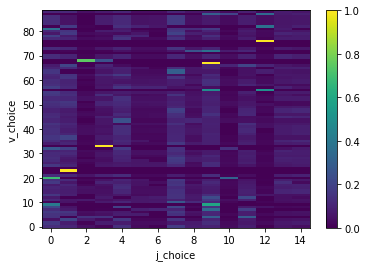

In [12]:
mdl_hb['j_choice'].plot()

In [13]:
fln_output_prefix = "mdl_hb"
# mdl_hb.export_plot_events(fln_output_prefix+"_CP")
# mdl_hb.export_plot_Pmarginals(fln_output_prefix+"_MP")

## Entropy


$ H = - \sum_x P_(x) \log(P(x)) $ 

In [14]:
import numpy as np
-np.dot(mdl_hb['v_choice'], np.nan_to_num(np.log2(mdl_hb['v_choice']), neginf=0, nan=0) )

/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)


5.252905287497762

In [15]:
mdl_hb.get_entropy_event('v_choice')

<xarray.DataArray ()>
array(5.25291424)

### Mutual Information

In [16]:
I_V_J = mdl_hb.get_mutual_information_events('v_choice', 'j_choice')
I_V_J

/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)


<xarray.DataArray ()>
array(0.0779008)

In [17]:
da_mi = mdl_hb.get_mutual_information()
da_mi

/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/statbiophys-dev

<xarray.DataArray 'mutual_information' (x: 9, y: 9)>
array([[0.00000000e+00, 2.74757454e-02, 7.79007955e-02, 3.34244341e-01,
        2.42224927e-03, 3.84618632e-03, 3.11240332e-03, 0.00000000e+00,
        0.00000000e+00],
       [2.74757454e-02, 0.00000000e+00, 1.54509182e-01, 7.40373019e-04,
        1.50139212e-01, 2.66774661e-01, 4.92915719e-03, 0.00000000e+00,
        0.00000000e+00],
       [7.79007955e-02, 1.54509182e-01, 0.00000000e+00, 7.48363481e-04,
        9.41603438e-03, 8.72144895e-03, 3.15006638e-01, 0.00000000e+00,
        0.00000000e+00],
       [3.34244341e-01, 7.40373019e-04, 7.48363481e-04, 0.00000000e+00,
        5.45436417e-05, 7.33990325e-05, 2.35845118e-05, 0.00000000e+00,
        0.00000000e+00],
       [2.42224927e-03, 1.50139212e-01, 9.41603438e-03, 5.45436417e-05,
        0.00000000e+00, 4.49012987e-01, 2.87003080e-04, 0.00000000e+00,
        0.00000000e+00],
       [3.84618632e-03, 2.66774661e-01, 8.72144895e-03, 7.33990325e-05,
        4.49012987e-01, 0.00000000e+00, 2.74201841e-04, 0.00000000e+00,
        0.00000000e+00],
       [3.11240332e-03, 4.92915719e-03, 3.15006638e-01, 2.35845118e-05,
        2.87003080e-04, 2.74201841e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])
Coordinates:
  * x        (x) <U8 'v_choice' 'd_gene' 'j_choice' ... 'vd_ins' 'dj_ins'
  * y        (y) <U8 'v_choice' 'd_gene' 'j_choice' ... 'vd_ins' 'dj_ins'

<AxesSubplot:>

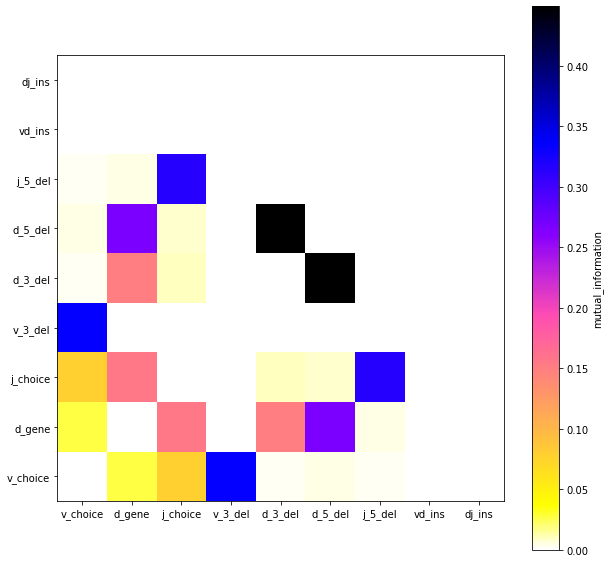

In [18]:
mdl_hb.plot_mutual_information(da_mi)

In [19]:
event_nickname1 = 'v_choice'
event_nickname2 = 'j_choice'

mdl = p3.get_default_IgorModel("human", "tcr_beta")

da_P_x_y = mdl.get_P_joint([event_nickname1, event_nickname2])
da_P_x = mdl.Pmarginal[event_nickname1]
da_P_y = mdl.Pmarginal[event_nickname2]

da_P_x_times_P_y = (da_P_x*da_P_y)
da_P_x_times_P_y

da_log_P_ratio = xr.zeros_like(da_P_x_y)

da_log_P_ratio.values = np.nan_to_num(
    np.log2(da_P_x_y / da_P_x_times_P_y), nan=0.0, neginf=0.0
)

# da_log_Value.values = np_log_Value
xr.dot( da_P_x_y, da_log_P_ratio )

Parms filename:  /home/olivares/.local/share/igor/models/human/tcr_beta/models/model_parms.txt
Marginals filename:  /home/olivares/.local/share/igor/models/human/tcr_beta/models/model_marginals.txt


/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)


<xarray.DataArray ()>
array(0.0779008)

In [21]:
da_mi = mdl_hb.get_mutual_information()

/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/statbiophys-dev

<AxesSubplot:>

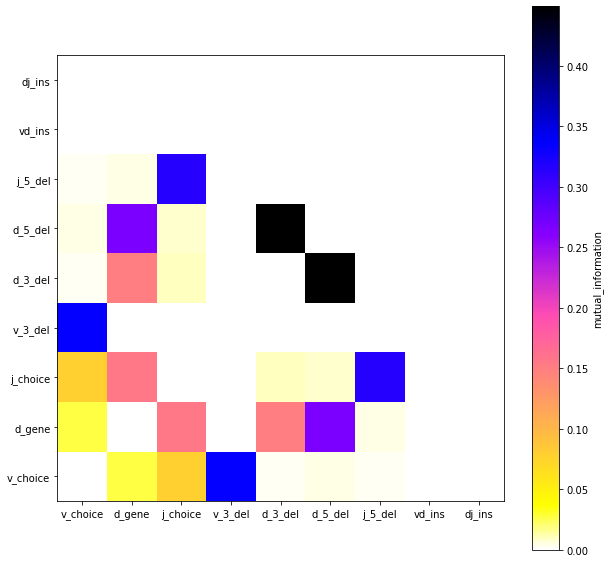

In [22]:
mdl_hb.plot_mutual_information(da_mi)

In [23]:
da_mi = mdl_hb.get_mutual_information()

/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)
/home/olivares/anaconda3/envs/statbiophys-dev

<AxesSubplot:>

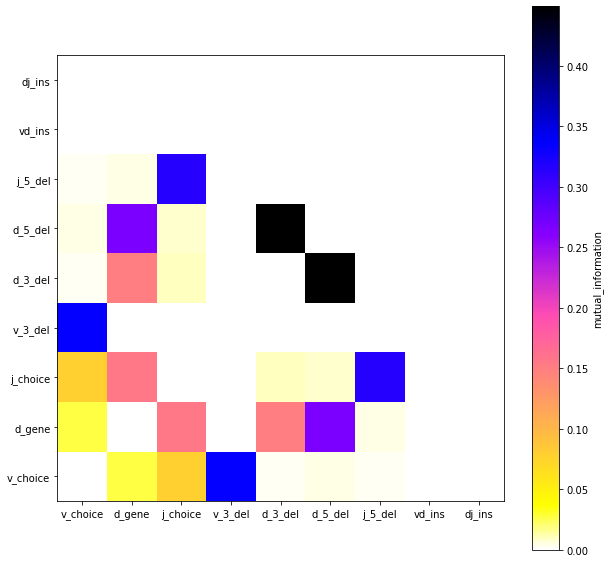

In [25]:
mdl_hb.plot_mutual_information(da_mi)

As can be seen in the Bayesian network, the number of deletions in V depends on choosen V

### Select events by probability

Here we can see which combinations of V and D are not possible, for our model

In [26]:
Pjoint_V_D = mdl_hb.get_P_joint(['v_choice', 'd_gene'])

da_tmp = Pjoint_V_D.where(Pjoint_V_D == 0)

df = da_tmp.to_dataframe('P_joint_V_D').dropna()
df #.to_csv('bibibi.csv', sep=';')

seq__v_choice  \
v_choice d_gene                                                      
22       0       GATGCCATGGTCATCCAGAACCCAAGATACCGGGTTACCCAGTTTG...   
         1       GATGCCATGGTCATCCAGAACCCAAGATACCGGGTTACCCAGTTTG...   
         2       GATGCCATGGTCATCCAGAACCCAAGATACCGGGTTACCCAGTTTG...   
24       0       GAGCCTGGAGTCAGCCAGACCCCCAGACACAAGGTCACCAACATGG...   
         1       GAGCCTGGAGTCAGCCAGACCCCCAGACACAAGGTCACCAACATGG...   
         2       GAGCCTGGAGTCAGCCAGACCCCCAGACACAAGGTCACCAACATGG...   
33       1       GATGCTGTAGTTACACAATTCCCAAGACACAGAATCATTGGGACAG...   
         2       GATGCTGTAGTTACACAATTCCCAAGACACAGAATCATTGGGACAG...   
67       0       AATGCTGGTGTCACTCAGACCCCAAAATTCCACATCCTGAAGACAG...   
         2       AATGCTGGTGTCACTCAGACCCCAAAATTCCACATCCTGAAGACAG...   
71       0       GCTGGAGTCTCCCAGTCCCCCAGTAACAAGGTCACAGAGAAGGGAA...   
         1       GCTGGAGTCTCCCAGTCCCCCAGTAACAAGGTCACAGAGAAGGGAA...   
         2       GCTGGAGTCTCCCAGTCCCCCAGTAACAAGGTCACAGAGAAGGGAA...   
74       0       GGTGCTGGAGTCTCCCAGACCCCCAGTAACAAGGTCACAGAGAAGG...   
         1       GGTGCTGGAGTCTCCCAGACCCCCAGTAACAAGGTCACAGAGAAGG...   
         2       GGTGCTGGAGTCTCCCAGACCCCCAGTAACAAGGTCACAGAGAAGG...   
75       0       GGTGCTGGAGTCTCCCAGACCCCCAGTAACAAGGTCACAGAGAAGG...   
         1       GGTGCTGGAGTCTCCCAGACCCCCAGTAACAAGGTCACAGAGAAGG...   
         2       GGTGCTGGAGTCTCCCAGACCCCCAGTAACAAGGTCACAGAGAAGG...   

                lbl__d_gene       seq__d_gene  P_joint_V_D  
v_choice d_gene                                             
22       0         TRBD1*01      GGGACAGGGGGC          0.0  
         1         TRBD2*01  GGGACTAGCGGGGGGG          0.0  
         2         TRBD2*02  GGGACTAGCGGGAGGG          0.0  
24       0         TRBD1*01      GGGACAGGGGGC          0.0  
         1         TRBD2*01  GGGACTAGCGGGGGGG          0.0  
         2         TRBD2*02  GGGACTAGCGGGAGGG          0.0  
33       1         TRBD2*01  GGGACTAGCGGGGGGG          0.0  
         2         TRBD2*02  GGGACTAGCGGGAGGG          0.0  
67       0         TRBD1*01      GGGACAGGGGGC          0.0  
         2         TRBD2*02  GGGACTAGCGGGAGGG          0.0  
71       0         TRBD1*01      GGGACAGGGGGC          0.0  
         1         TRBD2*01  GGGACTAGCGGGGGGG          0.0  
         2         TRBD2*02  GGGACTAGCGGGAGGG          0.0  
74       0         TRBD1*01      GGGACAGGGGGC          0.0  
         1         TRBD2*01  GGGACTAGCGGGGGGG          0.0  
         2         TRBD2*02  GGGACTAGCGGGAGGG          0.0  
75       0         TRBD1*01      GGGACAGGGGGC          0.0  
         1         TRBD2*01  GGGACTAGCGGGGGGG          0.0  
         2         TRBD2*02  GGGACTAGCGGGAGGG          0.0

In [27]:
mdl_hb['v_choice'].loc[22] #, mdl_hb['v_choice'].loc[67] 

<xarray.DataArray ()>
array(0.)
Coordinates:
    v_choice       int64 22
    lbl__v_choice  <U11 'TRBV15*03'
    seq__v_choice  object 'GATGCCATGGTCATCCAGAACCCAAGATACCGGGTTACCCAGTTTGGAAA...
Attributes:
    nickname:    v_choice
    event_type:  GeneChoice
    seq_type:    V_gene
    seq_side:    Undefined_side
    priority:    7
    parents:     []
    childs:      ['v_3_del', 'd_gene', 'j_choice']

In [28]:
mdl_hb.genomic_dataframe_dict['V'].loc[22]

name            M62376|TRBV15*03|Homo sapiens|(F)|V-REGION|135...
value           GATGCCATGGTCATCCAGAACCCAAGATACCGGGTTACCCAGTTTG...
anchor_index                                                270.0
Name: 22, dtype: object

## Use a default IGoR's model to generate sequences

## Generate synthetic sequences

## One sequence evaluation
Let's consider that we have a sequence of a TCR $\beta$ receptor

In [30]:
str_seq_hb = "ATCGAGTGCCGTTCCCTGGACTTTCAGGCCACAACTATGTTTTGGTATCGTCAGTTCCCGAAACAGAGTCTCATGCTGATGGCAACTTCCAATGAGGGCTCCAAGGCCACATACGAGCAAGGCGTCGAGAAGGACAAGTTTCTCATCAACCATGCAAGCCTGACCTTGTCCACTCTGACAGTGACCAGTGCCCATCCTGAAGACAGCAGCTTCTACATCTGCAGTGCTGGGGAAGGGCAGCCTGGAAACACCATATATTTTGGAG"

A classical approach would be make alignments of the VDJ segments and consider the maximun alignment of the segments as uniquely determinated construction.

In [31]:
## TODO: SHOW NAIVE ALIGNMENT

In [32]:
## TODO: Simple explantion of the inference process 

# Evaluate VDJ model

In [33]:
mdl = p3.get_default_IgorModel("human", "tcr_beta")

Parms filename:  /home/olivares/.local/share/igor/models/human/tcr_beta/models/model_parms.txt
Marginals filename:  /home/olivares/.local/share/igor/models/human/tcr_beta/models/model_marginals.txt


In [34]:
help(p3.evaluate)

Help on function evaluate in module pygor3.IgorIO:

evaluate(input_sequences: Union[str, pandas.core.frame.DataFrame, numpy.ndarray, pathlib.Path], mdl: pygor3.IgorIO.IgorModel, N_scenarios=None, igor_wd=None, airr_format=True, batch_clean=True)
    Evaluate input sequences with provided model
    :param input_sequences:Union[str, pd.DataFrame, np.ndarray, Path]
    :param mdl:IgorModel
    :param batch_clean: Remove all temporary files True by default.



### Evaluation AIRR format

In [35]:
df_scenarios = p3.evaluate(str_seq_hb, mdl) # , N_scenarios=20
df_scenarios

Writing model parms in file  ./igor_evaluating_bijg34il/dataIGoRA5zSZEZcn2_mdldata/models/model_parms.txt
Writing model marginals in file  ./igor_evaluating_bijg34il/dataIGoRA5zSZEZcn2_mdldata/models/model_marginals.txt
/home/olivares/.local/bin/igor -set_wd ./igor_evaluating_bijg34il -batch dataIGoRA5zSZEZcn2 -read_seqs ./igor_evaluating_bijg34il/dataIGoRA5zSZEZcn2input_sequences.csv
/home/olivares/.local/bin/igor -set_wd ./igor_evaluating_bijg34il -batch dataIGoRA5zSZEZcn2 -set_genomic  --V ./igor_evaluating_bijg34il/dataIGoRA5zSZEZcn2_mdldata/ref_genome/genomicVs.fasta --D ./igor_evaluating_bijg34il/dataIGoRA5zSZEZcn2_mdldata/ref_genome/genomicDs.fasta --J ./igor_evaluating_bijg34il/dataIGoRA5zSZEZcn2_mdldata/ref_genome/genomicJs.fasta -set_CDR3_anchors  --V ./igor_evaluating_bijg34il/dataIGoRA5zSZEZcn2_mdldata/ref_genome/V_gene_CDR3_anchors.csv --J ./igor_evaluating_bijg34il/dataIGoRA5zSZEZcn2_mdldata/ref_genome/J_gene_CDR3_anchors.csv -align  --all  
/home/olivares/.local/bin/igor

,sequence_id,sequence,rev_comp,productive,v_call,d_call,j_call,sequence_alignment,germline_alignment,junction,junction_aa,v_cigar,d_cigar,j_cigar,v_score,v_identity,v_support,v_sequence_start,v_sequence_end,v_germline_start,v_germline_end,v_alignment_start,v_alignment_end,d_score,d_identity,d_support,d_sequence_start,d_sequence_end,d_germline_start,d_germline_end,d_alignment_start,d_alignment_end,j_score,j_identity,j_support,j_sequence_start,j_sequence_end,j_germline_start,j_germline_end,j_alignment_start,j_alignment_end,sequence_aa,vj_in_frame,stop_codon,complete_vdj,locus,sequence_alignment_aa,n1_length,np1,np1_aa,np1_length,n2_length,np2,np2_aa,np2_length,p3v_length,p5d_length,p3d_length,p5j_length,scenario_rank,scenario_proba_cond_seq,pgen,quality,quality_alignment
0,0,ATCGAGTGCCGTTCCCTGGACTTTCAGGCCACAACTATGTTTTGGT...,F,NaN,M11955|TRBV20-1*01|Homo sapiens|F|V-REGION|427...,TRBD1*01,M14158|TRBJ1-3*01|Homo sapiens|F|J-REGION|1499...,GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTG...,NaN,TGCAGTGCTGGGGAAGGGCAGCCTGGAAACACCATATATTTT,CSAGEGQPGNTIYF,288M,4M,48M,1440,NaN,NaN,2,288,61,286,NaN,NaN,20,NaN,NaN,292,294,7,10,NaN,NaN,240,NaN,NaN,7,53,4,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,GGGGA,NaN,5,4,CAGC,NaN,4,0,0,0,0,1,0.146984,4.871310e-13,NaN,NaN
1,0,ATCGAGTGCCGTTCCCTGGACTTTCAGGCCACAACTATGTTTTGGT...,F,NaN,M11955|TRBV20-1*01|Homo sapiens|F|V-REGION|427...,TRBD2*02,M14158|TRBJ1-3*01|Homo sapiens|F|J-REGION|1499...,GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTG...,NaN,TGCAGTGCTGGGGAAGGGCAGCCTGGAAACACCATATATTTT,CSAGEGQPGNTIYF,288M,4M,48M,1440,NaN,NaN,2,288,61,286,NaN,NaN,20,NaN,NaN,292,294,14,17,NaN,NaN,240,NaN,NaN,7,53,4,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,GGGGA,NaN,5,4,CAGC,NaN,4,0,0,0,0,2,0.112527,4.871310e-13,NaN,NaN
2,0,ATCGAGTGCCGTTCCCTGGACTTTCAGGCCACAACTATGTTTTGGT...,F,NaN,M11955|TRBV20-1*01|Homo sapiens|F|V-REGION|427...,TRBD1*01,M14158|TRBJ1-3*01|Homo sapiens|F|J-REGION|1499...,GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTG...,NaN,TGCAGTGCTGGGGAAGGGCAGCCTGGAAACACCATATATTTT,CSAGEGQPGNTIYF,288M,3M,48M,1440,NaN,NaN,2,288,61,286,NaN,NaN,15,NaN,NaN,296,297,6,8,NaN,NaN,240,NaN,NaN,3,49,4,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,GGGGAAGGG,NaN,9,1,C,NaN,1,0,0,0,0,3,0.062955,4.871310e-13,NaN,NaN
3,0,ATCGAGTGCCGTTCCCTGGACTTTCAGGCCACAACTATGTTTTGGT...,F,NaN,M11955|TRBV20-1*01|Homo sapiens|F|V-REGION|427...,TRBD2*02,M14158|TRBJ1-3*01|Homo sapiens|F|J-REGION|1499...,GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTG...,NaN,TGCAGTGCTGGGGAAGGGCAGCCTGGAAACACCATATATTTT,CSAGEGQPGNTIYF,288M,3M,48M,1440,NaN,NaN,2,288,61,286,NaN,NaN,15,NaN,NaN,293,294,15,17,NaN,NaN,240,NaN,NaN,6,52,4,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,GGGGAA,NaN,6,3,AGC,NaN,4,0,0,1,0,4,0.060409,4.871310e-13,NaN,NaN
4,0,ATCGAGTGCCGTTCCCTGGACTTTCAGGCCACAACTATGTTTTGGT...,F,NaN,M11955|TRBV20-1*01|Homo sapiens|F|V-REGION|427...,TRBD1*01,M14158|TRBJ1-3*01|Homo sapiens|F|J-REGION|1499...,GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTG...,NaN,TGCAGTGCTGGGGAAGGGCAGCCTGGAAACACCATATATTTT,CSAGEGQPGNTIYF,288M,4M,48M,1440,NaN,NaN,2,288,61,286,NaN,NaN,20,NaN,NaN,293,295,10,13,NaN,NaN,240,NaN,NaN,6,52,4,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,GGGGAA,NaN,6,3,AGC,NaN,3,0,0,0,0,5,0.034684,4.871310e-13,NaN,NaN
5,0,ATCGAGTGCCGTTCCCTGGACTTTCAGGCCACAACTATGTTTTGGT...,F,NaN,M11955|TRBV20-1*01|Homo sapiens|F|V-REGION|427...,TRBD1*01,M14158|TRBJ1-3*01|Homo sapiens|F|J-REGION|1499...,GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTG...,NaN,TGCAGTGCTGGGGAAGGGCAGCCTGGAAACACCATATATTTT,CSAGEGQPGNTIYF,287M,4M,48M,1435,NaN,NaN,2,287,61,285,NaN,NaN,20,NaN,NaN,292,294,7,10,NaN,NaN,240,NaN,NaN,7,53,4,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,TGGGGA,NaN,6,4,CAGC,NaN,4,0,0,0,0,6,0.028806,4.871310e-13,NaN,NaN
6,0,ATCGAGTGCCGTTCCCTGGACTTTCAGGCCACAACTATGTTTTGGT...,F,NaN,M11955|TRBV20-1*01|Homo sapiens|F|V-REGION|427...,TRBD2*02,M14158|TRBJ1-3*01|Homo sapiens|F|J-REGION|1499...,GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTG...,NaN,TGCAGTGCTGGGGAAGGGCAGCCTGGAAACACCATATATTTT,CSAGEGQPGNTIYF,288M,3M,48M,1440,NaN,NaN,2,288,61,286,NaN,NaN,15,NaN,Na

### Evaluation IGoR format

In [36]:
df_scenarios = p3.evaluate(str_seq_hb, mdl_hb, airr_format=False) # , N_scenarios=20
df_scenarios

Writing model parms in file  ./igor_evaluating_0_m6dfsz/dataIGoRd4FFAJEGq0_mdldata/models/model_parms.txt
Writing model marginals in file  ./igor_evaluating_0_m6dfsz/dataIGoRd4FFAJEGq0_mdldata/models/model_marginals.txt
/home/olivares/.local/bin/igor -set_wd ./igor_evaluating_0_m6dfsz -batch dataIGoRd4FFAJEGq0 -read_seqs ./igor_evaluating_0_m6dfsz/dataIGoRd4FFAJEGq0input_sequences.csv
/home/olivares/.local/bin/igor -set_wd ./igor_evaluating_0_m6dfsz -batch dataIGoRd4FFAJEGq0 -set_genomic  --V ./igor_evaluating_0_m6dfsz/dataIGoRd4FFAJEGq0_mdldata/ref_genome/genomicVs.fasta --D ./igor_evaluating_0_m6dfsz/dataIGoRd4FFAJEGq0_mdldata/ref_genome/genomicDs.fasta --J ./igor_evaluating_0_m6dfsz/dataIGoRd4FFAJEGq0_mdldata/ref_genome/genomicJs.fasta -set_CDR3_anchors  --V ./igor_evaluating_0_m6dfsz/dataIGoRd4FFAJEGq0_mdldata/ref_genome/V_gene_CDR3_anchors.csv --J ./igor_evaluating_0_m6dfsz/dataIGoRd4FFAJEGq0_mdldata/ref_genome/J_gene_CDR3_anchors.csv -align  --all  
/home/olivares/.local/bin/igor

,scenario_rank,scenario_proba_cond_seq,v_choice,j_choice,d_gene,v_3_del,d_5_del,j_5_del,d_3_del,vd_ins,vd_dinucl,dj_ins,dj_dinucl,Mismatches,Pgen_estimate
seq_index,,,,,,,,,,,,,,,
0,1,0.146984,29,2,0,9,9,6,7,5,"[2, 2, 2, 2, 0]",4,"[1, 2, 0, 1]",[],4.871310e-13
0,2,0.112527,29,2,2,9,16,6,4,5,"[2, 2, 2, 2, 0]",4,"[1, 2, 0, 1]",[],4.871310e-13
0,3,0.062955,29,2,0,9,8,6,9,9,"[2, 2, 2, 2, 0, 0, 2, 2, 2]",1,[1],[],4.871310e-13
0,4,0.060409,29,2,2,9,17,6,3,6,"[2, 2, 2, 2, 0, 0]",3,"[1, 2, 0]",[],4.871310e-13
0,5,0.034684,29,2,0,9,12,6,4,6,"[2, 2, 2, 2, 0, 0]",3,"[1, 2, 0]",[],4.871310e-13
0,6,0.028806,29,2,0,10,9,6,7,6,"[3, 2, 2, 2, 2, 0]",4,"[1, 2, 0, 1]",[],4.871310e-13
0,7,0.023637,29,2,2,9,13,6,8,6,"[2, 2, 2, 2, 0, 0]",4,"[1, 2, 0, 1]",[],4.871310e-13
0,8,0.022053,29,2,2,10,16,6,4,6,"[3, 2, 2, 2, 2, 0]",4,"[1, 2, 0, 1]",[],4.871310e-13
0,9,0.017562,29,2,2,9,13,6,7,1,[2],8,"[1, 2, 0, 1, 2, 2, 2, 0]",[],4.871310e-13


## Visualize scenarios

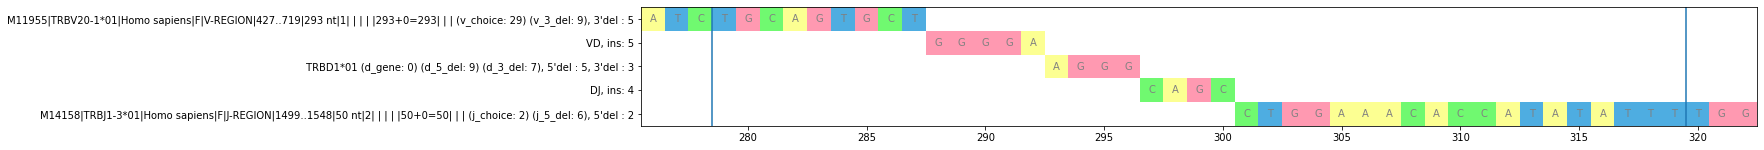

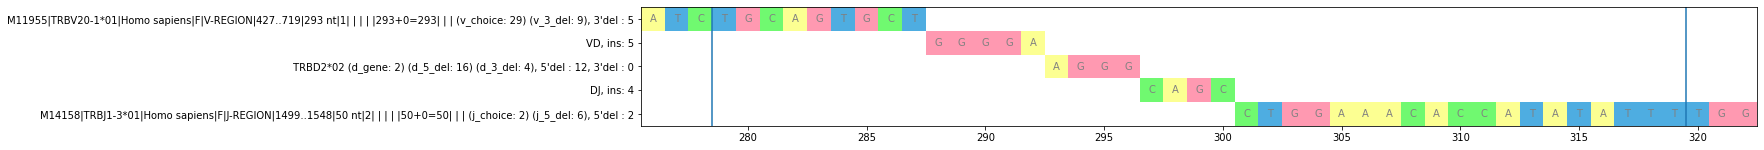

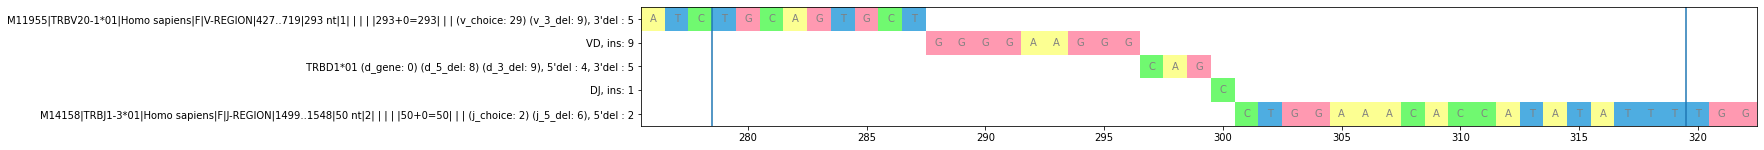

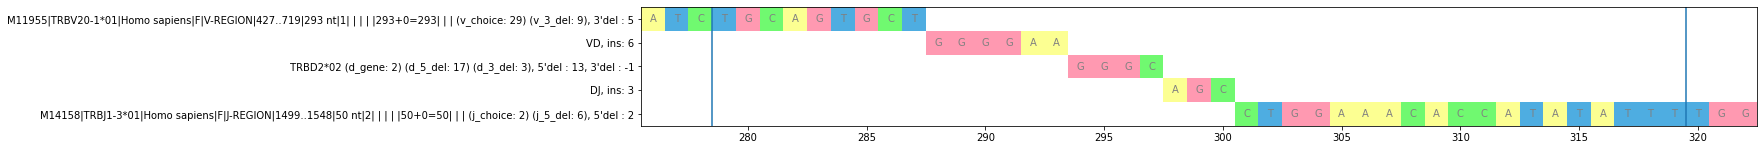

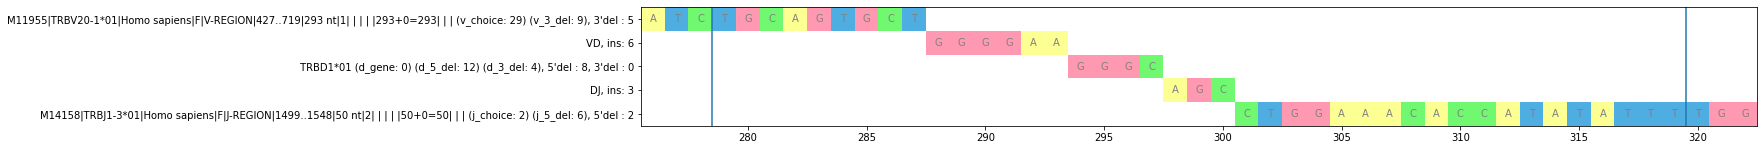

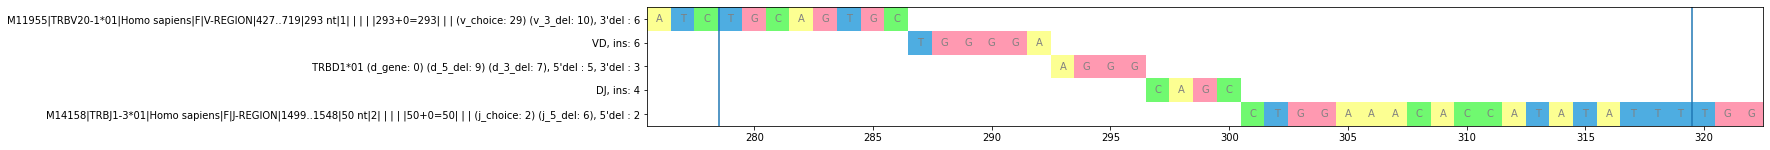

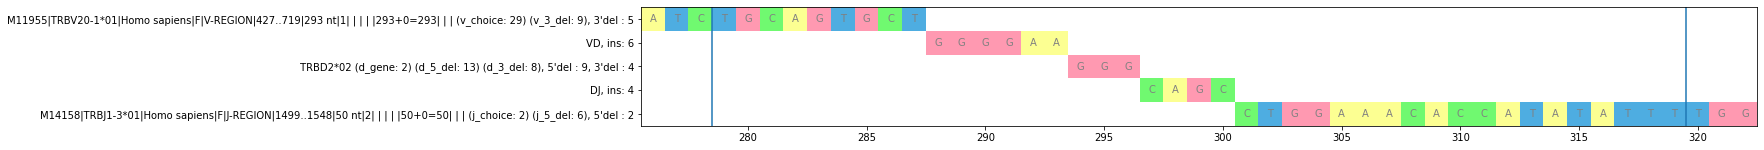

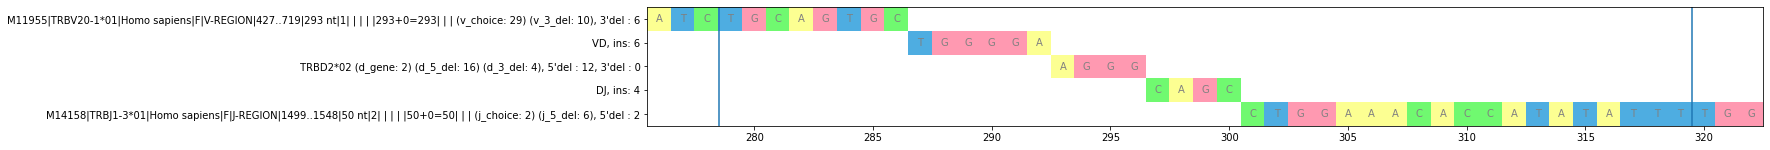

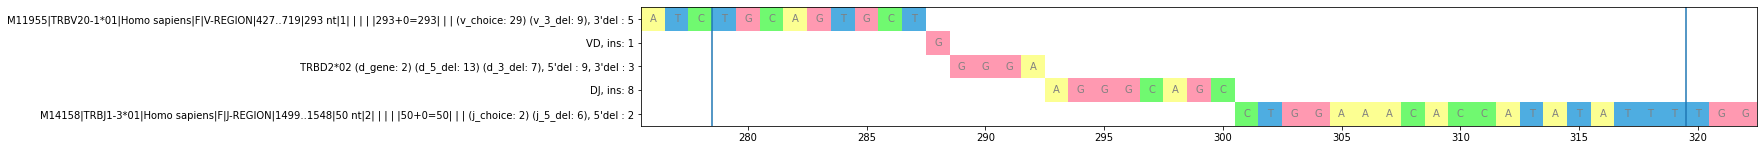

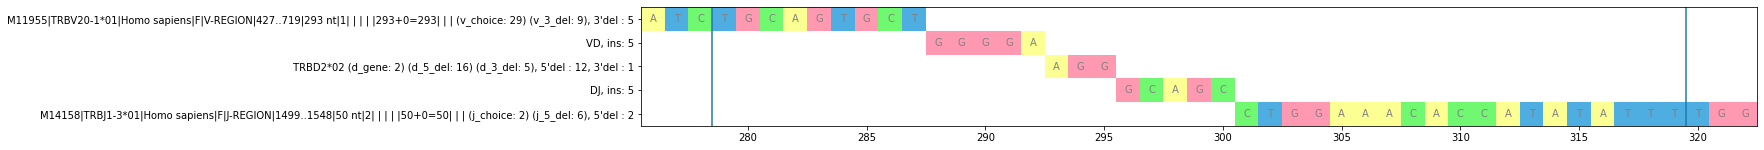

In [37]:
for ii, ps_scenario in df_scenarios.iterrows():
    mdl_hb.plot_scenario(ps_scenario) #, nt_lim=(200,340))

(<Figure size 1440x720 with 1 Axes>, <AxesSubplot:>)

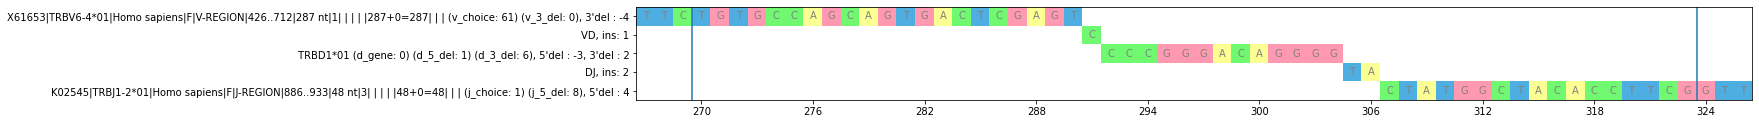

In [38]:
import pandas as pd
dict_scenario_fict = {
            'scenario_rank' : 1,
            'scenario_proba_cond_seq' : 0.9999,
            'v_choice' : 61,
            'j_choice' : 1,
            'd_gene' : 0,
            'v_3_del': 0,
            'd_5_del': 1,
            'j_5_del': 8,
            'd_3_del': 6,
            'vd_ins' : 1,
            'vd_dinucl': [1],
            'dj_ins': 2,
            'dj_dinucl': [0, 3],
            'Mismatches' : [],
            'norm_scenario_proba_cond_seq': 0.000225
        }
ps_scenario_fict = pd.Series(dict_scenario_fict)
mdl_hb.plot_scenario(ps_scenario_fict)

In [39]:
df_scenario_aln_fict = mdl_hb.get_df_scenario_aln_from_scenario(ps_scenario_fict)
df_scenario_aln_fict
mdl_hb.get_gene_segment_dict('V', ps_scenario)

OrderedDict([('gene_template',
              'GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTGGAACCTCTGTGAAGATCGAGTGCCGTTCCCTGGACTTTCAGGCCACAACTATGTTTTGGTATCGTCAGTTCCCGAAACAGAGTCTCATGCTGATGGCAACTTCCAATGAGGGCTCCAAGGCCACATACGAGCAAGGCGTCGAGAAGGACAAGTTTCTCATCAACCATGCAAGCCTGACCTTGTCCACTCTGACAGTGACCAGTGCCCATCCTGAAGACAGCAGCTTCTACATCTGCAGTGCTAGAGA'),
             ('int_gene_5_del', 0),
             ('int_gene_3_del', 5),
             ('palindrome_5_end', ''),
             ('gene_ini', 0),
             ('gene_end', 288),
             ('gene_cut',
              'GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTGGAACCTCTGTGAAGATCGAGTGCCGTTCCCTGGACTTTCAGGCCACAACTATGTTTTGGTATCGTCAGTTCCCGAAACAGAGTCTCATGCTGATGGCAACTTCCAATGAGGGCTCCAAGGCCACATACGAGCAAGGCGTCGAGAAGGACAAGTTTCTCATCAACCATGCAAGCCTGACCTTGTCCACTCTGACAGTGACCAGTGCCCATCCTGAAGACAGCAGCTTCTACATCTGCAGTGCT'),
             ('palindrome_3_end', ''),
             ('gene_segment',
              'GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTGGAACCTCTGTGAAGATCGAGT

In [42]:
mdl_hb.parms['d_gene']

,value,name
id,,
0,GGGACAGGGGGC,TRBD1*01
1,GGGACTAGCGGGGGGG,TRBD2*01
2,GGGACTAGCGGGAGGG,TRBD2*02


In [43]:
help(mdl_hb.plot_scenario)

Help on method plot_scenario in module pygor3.IgorIO:

plot_scenario(ps_scenario, nt_lim: Union[NoneType, tuple, list] = None, show_CDR3=True, ax=None) method of pygor3.IgorIO.IgorModel instance
    Return matplotlib fig, ax
    :param ps_scenario: Pandas Series scenario
    :param nt_lim:Union[None,tuple,list] region limits to show the scenario alignment
    default give boundaries around CDR3, if no anchors in model, show the whole scenario
    :param show_CDR3: Show CDR3 lines default(=True)



# Observables from scenarios

## Predefine Functions for Scenarios

In [45]:
fln_scenarios = "best_scenarios_counts.csv"
df_scenarios_many = mdl_hb.get_dataframe_scenarios(fln_scenarios)

igor_fln_generated_realizations_werr:  best_scenarios_counts.csv


### Pairwise Probabilities

In [46]:
help(mdl_hb.get_P_from_scenarios_cols)

Help on method get_P_from_scenarios_cols in module pygor3.IgorIO:

get_P_from_scenarios_cols(df_scenarios, colname_list) method of pygor3.IgorIO.IgorModel instance
    Return xarray with marginalize probabilities of listed columns in dataframe scenarios df_scenarios
    :param df_scenarios: Scenarios with normalize probability. Loaded with self.get_dataframe_scenarios()
    :param colname_list: List of variables preserve for marginalization



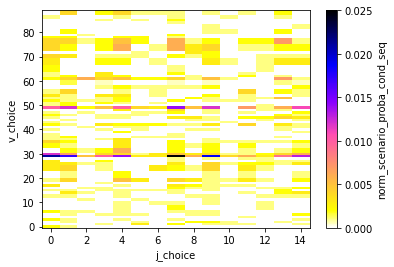

In [47]:
Pjoint_V_J_scens = mdl_hb.get_P_from_scenarios_cols(df_scenarios_many, ['v_choice', 'j_choice'])
Pjoint_V_J_scens.plot(cmap='gnuplot2_r')

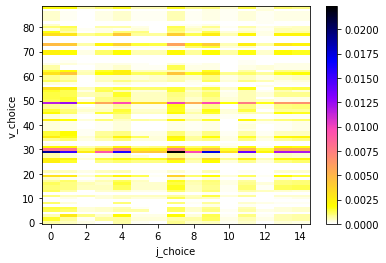

In [48]:
mdl_hb.get_P_joint(['v_choice', 'j_choice']).plot(cmap='gnuplot2_r')

### Mutual Information from scenarios

In [49]:
help(mdl_hb.get_mutual_information_events_from_df_scenarios)

Help on method get_mutual_information_events_from_df_scenarios in module pygor3.IgorIO:

get_mutual_information_events_from_df_scenarios(df_scenarios, event_nickname_x, event_nickname_y) method of pygor3.IgorIO.IgorModel instance
    Return mutual information in log10 of the desired events



In [50]:
mdl_hb.get_mutual_information_events_from_df_scenarios(df_scenarios_many, 'v_choice', 'j_choice')

mutual_information ( v_choice ,  j_choice ):  0.6392623620052954


<xarray.DataArray 'norm_scenario_proba_cond_seq' ()>
array(0.63926236)

In [56]:
da_mi_scenarios = mdl_hb.get_mutual_information_from_df_scenarios(df_scenarios_many)

mutual_information ( v_choice ,  j_choice ):  0.6392623620052954
mutual_information ( v_choice ,  d_gene ):  0.08894391386660068
mutual_information ( v_choice ,  v_3_del ):  0.7021801087511944
mutual_information ( v_choice ,  d_5_del ):  0.35886454309758736
mutual_information ( v_choice ,  j_5_del ):  0.4667910640736827
mutual_information ( v_choice ,  d_3_del ):  0.3381390129055559
mutual_information ( v_choice ,  vd_ins ):  0.36950632876861056
mutual_information ( v_choice ,  dj_ins ):  0.34050716113668833
mutual_information ( j_choice ,  d_gene ):  0.16839619808892387
mutual_information ( j_choice ,  v_3_del ):  0.1373839342864651
mutual_information ( j_choice ,  d_5_del ):  0.11353204598699257
mutual_information ( j_choice ,  j_5_del ):  0.44550937210770414
mutual_information ( j_choice ,  d_3_del ):  0.11443530326748617
mutual_information ( j_choice ,  vd_ins ):  0.11203857283894578
mutual_information ( j_choice ,  dj_ins ):  0.09776360260846355
mutual_information ( d_gene ,  v_3_

In [57]:
da_mi_scenarios#.to_dataframe().dropna()

<xarray.DataArray 'mutual_information' (x: 9, y: 9)>
array([[0.        , 0.63926236, 0.08894391, 0.70218011, 0.35886454,
        0.46679106, 0.33813901, 0.36950633, 0.34050716],
       [0.63926236, 0.        , 0.1683962 , 0.13738393, 0.11353205,
        0.44550937, 0.1144353 , 0.11203857, 0.0977636 ],
       [0.08894391, 0.1683962 , 0.        , 0.01724109, 0.36172414,
        0.02186478, 0.22353113, 0.01319444, 0.01294449],
       [0.70218011, 0.13738393, 0.01724109, 0.        , 0.06598438,
        0.09843108, 0.06941839, 0.10582383, 0.07374102],
       [0.35886454, 0.11353205, 0.36172414, 0.06598438, 0.        ,
        0.08378407, 0.49501981, 0.10780812, 0.07617536],
       [0.46679106, 0.44550937, 0.02186478, 0.09843108, 0.08378407,
        0.        , 0.08559953, 0.07299823, 0.10957597],
       [0.33813901, 0.1144353 , 0.22353113, 0.06941839, 0.49501981,
        0.08559953, 0.        , 0.06822031, 0.08640308],
       [0.36950633, 0.11203857, 0.01319444, 0.10582383, 0.10780812,
        0.07299823, 0.06822031, 0.        , 0.06747319],
       [0.34050716, 0.0977636 , 0.01294449, 0.07374102, 0.07617536,
        0.10957597, 0.08640308, 0.06747319, 0.        ]])
Coordinates:
  * x        (x) <U8 'v_choice' 'j_choice' 'd_gene' ... 'vd_ins' 'dj_ins'
  * y        (y) <U8 'v_choice' 'j_choice' 'd_gene' ... 'vd_ins' 'dj_ins'

<AxesSubplot:>

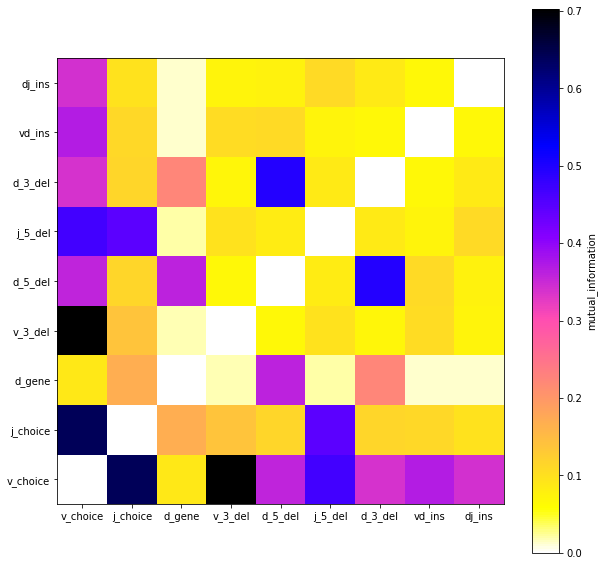

In [59]:
mdl_hb.plot_mutual_information(da_mi_scenarios)

<AxesSubplot:>

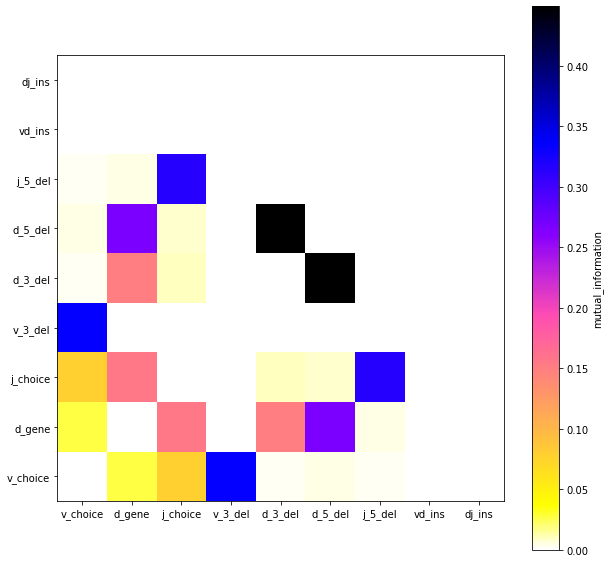

In [24]:
mdl_hb.plot_mutual_information(da_mi)

### Mean and Variance of values in scenarios dataframe

The simplest way to get the realization values of events in scenario is using the function
IgorModel.get_realization_value_from_df_scenarios(df_scenarios, 'event_nickname')

In [91]:
help(mdl_hb.get_realization_value_from_df_scenarios)

Help on method get_realization_value_from_df_scenarios in module pygor3.IgorIO:

get_realization_value_from_df_scenarios(df_scenarios, event_nickname) method of pygor3.IgorIO.IgorModel instance



In [93]:
mdl_hb.get_realization_value_from_df_scenarios(df_scenarios_many, 'd_gene')

seq_index
998        GGGACAGGGGGC
998        GGGACAGGGGGC
998        GGGACAGGGGGC
998        GGGACAGGGGGC
998        GGGACAGGGGGC
             ...       
703    GGGACTAGCGGGGGGG
703    GGGACTAGCGGGGGGG
703    GGGACTAGCGGGGGGG
703        GGGACAGGGGGC
703        GGGACAGGGGGC
Length: 10000, dtype: object

In [94]:
mdl_hb.get_realization_value_from_df_scenarios(df_scenarios_many, 'j_5_del')

seq_index
998    15
998    15
998    15
998    15
998    15
       ..
703     4
703     5
703     4
703     4
703     4
Length: 10000, dtype: int64

If the values are assigned to a column in scenarios dataframe (df_scenarios_many) the weighted average can be calculated using the IgorModel.w_mean_df_scenarios

In [96]:
ps_j_5_del = mdl_hb.get_realization_value_from_df_scenarios(df_scenarios_many, 'j_5_del')
df_scenarios_many['j_5_del_value'] = ps_j_5_del
# ps_j_5_del

In [101]:
help(mdl_hb.w_mean_df_scenarios)
help(mdl_hb.w_variance_df_scenarios)

Help on method w_mean_df_scenarios in module pygor3.IgorIO:

w_mean_df_scenarios(column_name: str, df_scenarios: pandas.core.frame.DataFrame) method of pygor3.IgorIO.IgorModel instance
    Return weighted mean with the normalized probabilities for each
    scenario (norm_scenario_proba_cond_seq)
    :param column_name: column name of df_scenario to calculate the average
    :param df_scenarios: Scenarios with normalize probability. Loaded with self.get_dataframe_scenarios()

Help on method w_variance_df_scenarios in module pygor3.IgorIO:

w_variance_df_scenarios(colname_1: str, df_scenarios: pandas.core.frame.DataFrame) method of pygor3.IgorIO.IgorModel instance
    Return weighted covariance with the normalized probabilities of the column names given for each
    scenario (norm_scenario_proba_cond_seq)
    :param colname_1: column name of df_scenario to calculate the weighted covariance
    :param colname_2: column name of df_scenario to calculate the weighted covariance
    :param df

In [98]:
mdl_hb.w_mean_df_scenarios('j_5_del_value', df_scenarios_many)

4.157669017539739

In [90]:
mdl_hb.w_variance_df_scenarios('j_5_del_value', df_scenarios_many)

10.537416194979743

In [102]:
help(mdl_hb.get_observable_from_df_scenarios)

Help on method get_observable_from_df_scenarios in module pygor3.IgorIO:

get_observable_from_df_scenarios(observable_function, df_scenarios: pandas.core.frame.DataFrame) method of pygor3.IgorIO.IgorModel instance
    Return a pandas series with the calculated observable over the df_scenarios dataframe.
    :param observable_function: This function should use the varibles with self.realization
    :param df_scenarios: Scenarios dataframe loaded with self.get_dataframe_scenarios.



In [103]:
def f_total_insertions(ps_scenario):
    my_internal = np.zeros(len(mdl.parms['vd_ins']))
    vd_ins = mdl.realization(ps_scenario, 'vd_ins')
    dj_ins = mdl.realization(ps_scenario, 'dj_ins')
    # my_internal[vd_ins.id] = 1
    # return my_internal 
    return vd_ins.value + dj_ins.value

def f_total_deletions(ps_scenario):
    v_3_del = mdl.realization(ps_scenario, 'v_3_del')
    d_5_del = mdl.realization(ps_scenario, 'd_5_del')
    d_3_del = mdl.realization(ps_scenario, 'd_3_del')
    j_5_del = mdl.realization(ps_scenario, 'j_5_del')
    return v_3_del.value + d_5_del.value + d_3_del.value + j_5_del.value

In [104]:
mean_insertions = mdl.w_average_function_df_scenarios(f_total_insertions, df_scenarios_many)
mean_deletions = mdl.w_average_function_df_scenarios(f_total_deletions, df_scenarios_many)

In [105]:
mean_insertions, mean_deletions

(10.202437426325016, 15.645906964009958)